In [10]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [11]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_twitter_qualitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [12]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [13]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

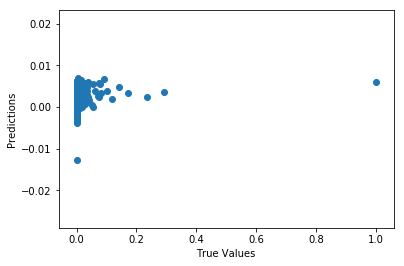

[  1.43897756e-11  -2.21242570e-06  -2.20399343e-03   1.14302572e-01
  -1.42398715e-05  -1.32901136e-06  -1.47094660e-02   1.07751743e-02
   2.88247161e-01  -2.53181795e-02   6.57330976e-07  -1.52579610e-07
  -4.30771309e-06   2.17306621e-06   9.16318224e-04  -9.84119177e-04
   1.40155174e-03   9.17182378e-04   2.45646730e-01   1.52453987e-02
   9.72890524e-03  -2.02505317e-03  -1.10979101e+00  -8.48379264e-01
  -1.23842375e-04   2.47952867e-06   2.29544525e-05  -1.48546720e-07
   2.31665027e-07  -1.65604478e-07  -1.47437715e-07]


In [14]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [15]:
scores = cross_val_score(model, df, y, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [ -3.03539708e+01  -8.00331316e-01  -3.11524774e-01  -1.49902490e-01
  -2.11959662e-02   4.92416621e-03   3.47981654e-02   2.19878451e-02
   1.18589674e-02   5.63541704e-04]


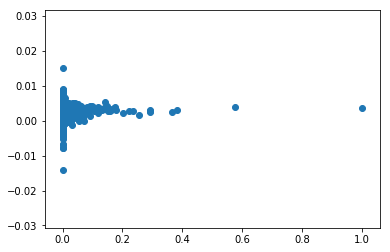

In [16]:
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)
plt.show()

In [17]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.00640352028939


In [18]:
print(lm.coef_)

[  1.43897756e-11  -2.21242570e-06  -2.20399343e-03   1.14302572e-01
  -1.42398715e-05  -1.32901136e-06  -1.47094660e-02   1.07751743e-02
   2.88247161e-01  -2.53181795e-02   6.57330976e-07  -1.52579610e-07
  -4.30771309e-06   2.17306621e-06   9.16318224e-04  -9.84119177e-04
   1.40155174e-03   9.17182378e-04   2.45646730e-01   1.52453987e-02
   9.72890524e-03  -2.02505317e-03  -1.10979101e+00  -8.48379264e-01
  -1.23842375e-04   2.47952867e-06   2.29544525e-05  -1.48546720e-07
   2.31665027e-07  -1.65604478e-07  -1.47437715e-07]
